In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!tar -xf archive.zip 

In [4]:
#1)
ser1 = pd.Series([2, 3, 5, 7, 11, 13, 17, 23, 29, 31])
ser2 = pd.Series(np.random.random(5))
ser3 = pd.Series(np.random.randint(1, 100, 5), index = ['A', 'B', 'C', 'D', 'E'])
print(ser3)
ser3['C']

A    96
B    86
C    30
D    50
E    40
dtype: int32


np.int32(30)

In [5]:
#2)
np.random.seed(0)
data = {
    'A': np.random.randint(1, 101, size=5),
    'B': np.random.randint(1, 101, size=5),
    'C': np.random.randint(1, 101, size=5)
}

df = pd.DataFrame(data)
df

,A,B,C
0,45,10,71
1,48,84,89
2,65,22,89
3,68,37,13
4,68,88,59


In [6]:
#3)
heart_data = pd.read_csv('heart_failure_prediction.csv')

first_100 = heart_data.head(100)
first_100.to_csv('heart_failure_sample.csv')

heart_data.to_excel('heart_failure_data.xlsx')

heart_data.to_json('heart_failure_data.json')

In [7]:
#4)
heart_data.info()
heart_data.head(10)
heart_data.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [8]:
#5)
heart_data[['Age', 'Sex']]
heart_data['AgeGroup'] = np.select(
    [heart_data['Age'] < 50, heart_data['Age'] > 70],
    ['Young', 'Senior'],
    default='Middle-aged')
heart_data = heart_data.drop(['RestingECG'], axis=1)
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,172,N,0.0,Up,0,Young
1,49,F,NAP,160,180,0,156,N,1.0,Flat,1,Young
2,37,M,ATA,130,283,0,98,N,0.0,Up,0,Young
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,1,Young
4,54,M,NAP,150,195,0,122,N,0.0,Up,0,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,132,N,1.2,Flat,1,Young
914,68,M,ASY,144,193,1,141,N,3.4,Flat,1,Middle-aged
915,57,M,ASY,130,131,0,115,Y,1.2,Flat,1,Middle-aged
916,57,F,ATA,130,236,0,174,N,0.0,Flat,1,Middle-aged


In [9]:
#6)
heart_data.iloc[4, 2]
heart_data.loc[heart_data['Sex'] == 'M', ['Age', 'ChestPainType']]
heart_data.iloc[0:5, 2:4]

,ChestPainType,RestingBP
0,ATA,140
1,NAP,160
2,ATA,130
3,ASY,138
4,NAP,150


In [10]:
#7)
df_new = heart_data[(heart_data['Age'] > 60) & (heart_data['HeartDisease'] == True)]
df = heart_data[['ChestPainType', 'Age']]
df.groupby('ChestPainType').mean()

,Age
ChestPainType,
ASY,54.959677
ATA,49.242775
NAP,53.310345
TA,54.826087


In [11]:
#8)
heart_data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
AgeGroup          0
dtype: int64

In [12]:
#9)
heart_data_male = heart_data[heart_data['Sex'] == 'M']
heart_data_female = heart_data[heart_data['Sex'] == 'F']
heart_data_male['Group'] = 'Male'
heart_data_female['Group'] = 'Female'
heart_data_new = pd.concat([heart_data_male, heart_data_female])

C:\Users\msaip\AppData\Local\Temp\ipykernel_20156\1612867234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data_male['Group'] = 'Male'
C:\Users\msaip\AppData\Local\Temp\ipykernel_20156\1612867234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data_female['Group'] = 'Female'


In [13]:
def BMI(height, weight):
    bmi = weight / (height ** 2)

heart_data_new.info()
#There is no weight and height data in the dataset.

heart_data_new['AgeTimes100'] = heart_data_new['Age'].apply(lambda x: x*100)

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 916
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
 11  AgeGroup        918 non-null    object 
 12  Group           918 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 100.4+ KB


# Question 2

In [14]:
x = np.linspace(0, 10, 100)
%matplotlib inline

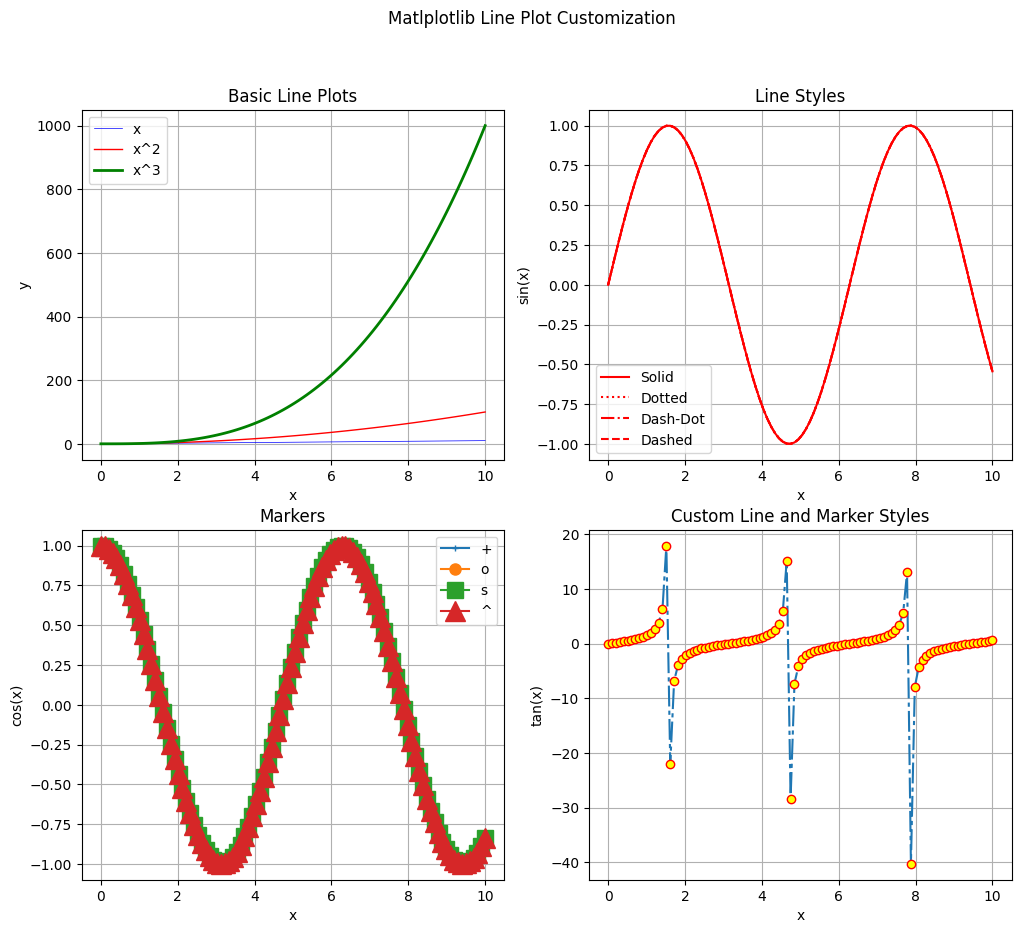

In [50]:
#1)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(x, x, color='blue', linewidth=0.5)
ax[0, 0].plot(x, x**2, color='red', linewidth=1)
ax[0, 0].plot(x, x**3, color='green', linewidth=2)
ax[0, 0].legend(["x", "x^2", "x^3"])
ax[0, 0].set_title('Basic Line Plots')
ax[0, 0].set_xlabel("x")
ax[0, 0].set_ylabel("y")
ax[0, 0].grid(True)

ax[0, 1].plot(x, np.sin(x), linestyle="solid", color="red")
ax[0, 1].plot(x, np.sin(x), linestyle="dotted", color="red" )
ax[0, 1].plot(x, np.sin(x), linestyle="-." , color="red")
ax[0, 1].plot(x, np.sin(x), linestyle="dashed" , color="red")
ax[0, 1].legend(['Solid', 'Dotted', 'Dash-Dot', 'Dashed'])
ax[0, 1].set_title("Line Styles")
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("sin(x)")
ax[0, 1].grid(True)

ax[1, 0].plot(x, np.cos(x), linestyle="solid", marker="+", markersize=5)
ax[1, 0].plot(x, np.cos(x), linestyle="solid", marker="o", markersize=8)
ax[1, 0].plot(x, np.cos(x), linestyle="solid", marker="s", markersize=11)
ax[1, 0].plot(x, np.cos(x), linestyle="solid", marker="^", markersize=14)
ax[1, 0].legend(['+', 'o', 's', '^'])
ax[1, 0].set_title("Markers")
ax[1, 0].set_xlabel("x")
ax[1, 0].set_ylabel("cos(x)")
ax[1, 0].grid(True)

tan, = ax[1, 1].plot(x, np.tan(x), marker="o", markerfacecolor="yellow", markeredgecolor="red")
tan.set_dashes([2, 2, 10, 2])
ax[1, 1].set_title("Custom Line and Marker Styles")
ax[1, 1].set_xlabel("x")
ax[1, 1].set_ylabel("tan(x)")
ax[1, 1].grid(True)

fig.suptitle("Matlplotlib Line Plot Customization")
fig.savefig("matplotlib_assignment.png")